In [1]:
!git clone https://github.com/MagicShow1999/CV-Final-Project
%cd CV-Final-Project/

C:\Users\92063\Desktop\CV-Final-Project


fatal: destination path 'CV-Final-Project' already exists and is not an empty directory.


In [2]:
import torch 
from torchvision import transforms , models 
from PIL import Image 
import matplotlib.pyplot as plt
import numpy as np

# util file is our own file which contains preprocess functions
import util as util
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
content_img_path='./image/content_img.jpg'
style_img_path='./image/style_img_v1.jpg'
ratio=2

torch.Size([1, 3, 1200, 1920])
torch.Size([1, 3, 681, 968])


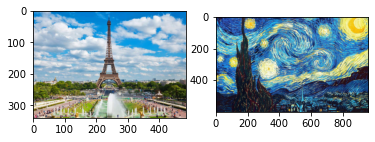

In [8]:

# read image
style = util.read_image(style_img_path).to(device)
content = util.read_image(content_img_path).to(device)

print(style.shape)
print(content.shape)

style = util.read_image(style_img_path, style.shape[2]//ratio, style.shape[3]//ratio).to(device)
content = util.read_image(content_img_path,content.shape[2]//ratio, content.shape[3]//ratio).to(device)
# show image
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.imshow(util.torchTensorToImage(content),label = "Content")
ax2.imshow(util.torchTensorToImage(style),label = "Style")
plt.show()
 
# load the model
model = models.vgg19(pretrained=True).features
# set the requires_grad to false
for param in model.parameters():
    param.requires_grad = False

model.to(device)


def activate_model(input, model):
  layers = {
    '0' : 'conv1_1',
    '5' : 'conv2_1',
    '10': 'conv3_1',
    '19': 'conv4_1',
    '21': 'conv4_2',
    '28': 'conv5_1'
  }
  features = {}
  x = input
  for name,layer in model._modules.items():
      x = layer(x)
      if name in layers:
          features[layers[name]] = x 
  
  return features


    
style_features = activate_model(style,model)
content_features = activate_model(content,model)

style_feature_ratio = {"conv1_1" : 1.0, 
                 "conv2_1" : 0.8,
                 "conv3_1" : 0.4,
                 "conv4_1" : 0.2,
                 "conv5_1" : 0.1}

# calculate the gram matrix of style features
style_grams = {}
for layer in style_features:
  style_grams[layer] = util.gram_matrix(style_features[layer])

output = content.clone().requires_grad_(True).to(device)



In [9]:
def style_transfer():
  for i in range(1,epochs+1):
    output_features = activate_model(output,model)
    content_loss = torch.mean((content_features['conv4_2']-output_features['conv4_2'])**2)

    style_loss = 0
    for layer in style_feature_ratio:
        style_gram = style_grams[layer]
        output_gram = output_features[layer]
        _,d,w,h = output_gram.shape
        output_gram = util.gram_matrix(output_gram)

        style_loss += (style_feature_ratio[layer]*torch.mean((output_gram-style_gram)**2))/d*w*h
    
    total_loss = content_wt*content_loss + style_wt*style_loss 
    
    if i % 200==0:       
        print("epoch ",i," ", total_loss)
    
    optimizer.zero_grad()
    total_loss.backward()
    optimizer.step()
    if i % intervention == 0:
        util.paint_image(output)
        

In [10]:
# initialize hyperparameters for training
content_wt = 100
style_wt = 1e8
lr = 0.1
intervention = 500
epochs = 4000

optimizer = torch.optim.Adam([output],lr=lr)

epoch  200   tensor(17127.1953, device='cuda:0', grad_fn=<AddBackward0>)
epoch  400   tensor(6603.7192, device='cuda:0', grad_fn=<AddBackward0>)


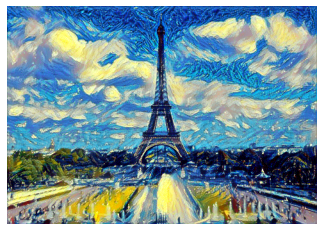

epoch  600   tensor(3835.4177, device='cuda:0', grad_fn=<AddBackward0>)
epoch  800   tensor(2656.5320, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1000   tensor(2031.9609, device='cuda:0', grad_fn=<AddBackward0>)


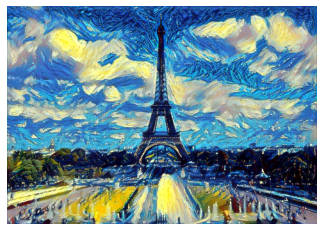

epoch  1200   tensor(1681.0256, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1400   tensor(1833.1494, device='cuda:0', grad_fn=<AddBackward0>)


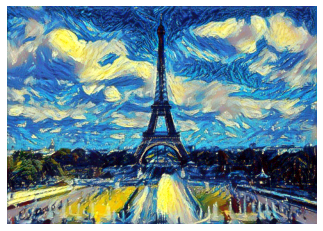

epoch  1600   tensor(8932.5127, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1800   tensor(1266.9255, device='cuda:0', grad_fn=<AddBackward0>)
epoch  2000   tensor(1345.8047, device='cuda:0', grad_fn=<AddBackward0>)


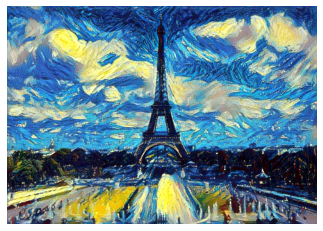

epoch  2200   tensor(1811.7397, device='cuda:0', grad_fn=<AddBackward0>)
epoch  2400   tensor(1577.7402, device='cuda:0', grad_fn=<AddBackward0>)


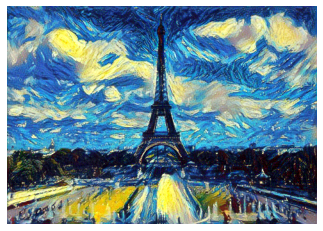

epoch  2600   tensor(2316.9204, device='cuda:0', grad_fn=<AddBackward0>)
epoch  2800   tensor(1038.7642, device='cuda:0', grad_fn=<AddBackward0>)
epoch  3000   tensor(2220.2522, device='cuda:0', grad_fn=<AddBackward0>)


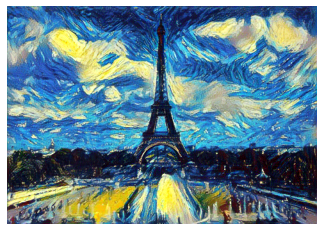

epoch  3200   tensor(1098.0085, device='cuda:0', grad_fn=<AddBackward0>)
epoch  3400   tensor(961.0380, device='cuda:0', grad_fn=<AddBackward0>)


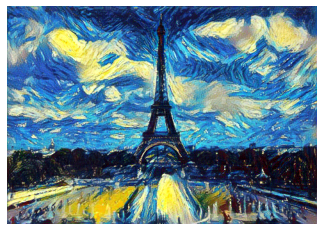

epoch  3600   tensor(1539.3801, device='cuda:0', grad_fn=<AddBackward0>)
epoch  3800   tensor(1025.8447, device='cuda:0', grad_fn=<AddBackward0>)
epoch  4000   tensor(870.2696, device='cuda:0', grad_fn=<AddBackward0>)


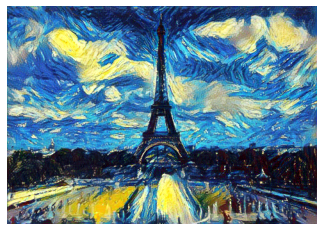

In [11]:
style_transfer()

In [13]:
util.save_image(output,'./output/adam_half_size_normal_ratio.jpg')


Successfully save the final stylized image to: ./output/adam_half_size_normal_ratio.jpg


epoch  200   tensor(159680.8750, device='cuda:0', grad_fn=<AddBackward0>)
epoch  400   tensor(63539.9258, device='cuda:0', grad_fn=<AddBackward0>)


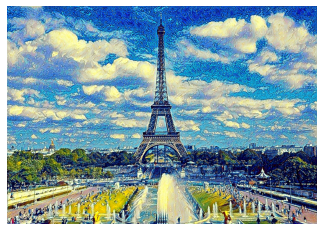

epoch  600   tensor(35249.2578, device='cuda:0', grad_fn=<AddBackward0>)
epoch  800   tensor(23021.7480, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1000   tensor(16427.3887, device='cuda:0', grad_fn=<AddBackward0>)


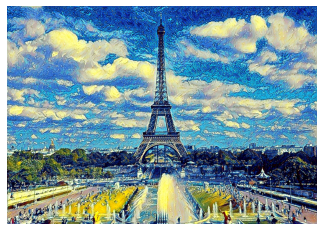

epoch  1200   tensor(12401.4414, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1400   tensor(9741.9336, device='cuda:0', grad_fn=<AddBackward0>)


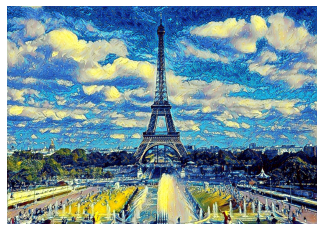

epoch  1600   tensor(7881.5684, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1800   tensor(6519.1069, device='cuda:0', grad_fn=<AddBackward0>)
epoch  2000   tensor(5484.9609, device='cuda:0', grad_fn=<AddBackward0>)


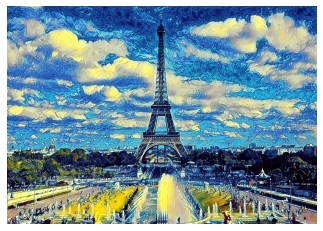

epoch  2200   tensor(4677.7266, device='cuda:0', grad_fn=<AddBackward0>)
epoch  2400   tensor(4032.1816, device='cuda:0', grad_fn=<AddBackward0>)


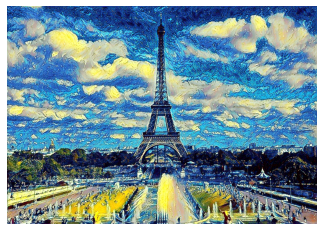

epoch  2600   tensor(3506.3101, device='cuda:0', grad_fn=<AddBackward0>)
epoch  2800   tensor(3697.7905, device='cuda:0', grad_fn=<AddBackward0>)
epoch  3000   tensor(2813.3240, device='cuda:0', grad_fn=<AddBackward0>)


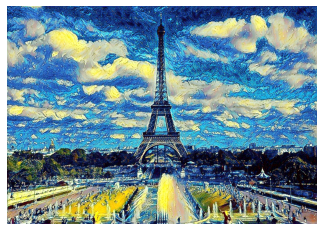

epoch  3200   tensor(2502.7661, device='cuda:0', grad_fn=<AddBackward0>)
epoch  3400   tensor(2260.6394, device='cuda:0', grad_fn=<AddBackward0>)


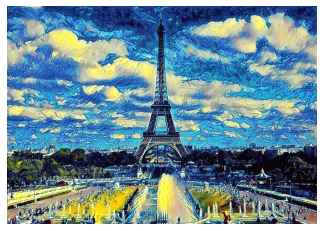

epoch  3600   tensor(2072.0068, device='cuda:0', grad_fn=<AddBackward0>)
epoch  3800   tensor(6623.0918, device='cuda:0', grad_fn=<AddBackward0>)
epoch  4000   tensor(5070.9014, device='cuda:0', grad_fn=<AddBackward0>)


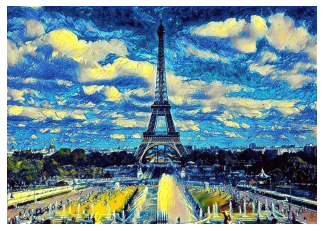

In [120]:
style_transfer()

In [12]:
util.save_image(output,'./output/adam_reg_size_highlr.jpg')

Successfully save the final stylized image to: ./output/adam_reg_size_highlr.jpg


In [ ]:

style_transfer()
util.save_image(output,'./output/adam_half_size.jpg')

epoch  200   tensor(13467.0430, device='cuda:0', grad_fn=<AddBackward0>)
epoch  400   tensor(5412.1299, device='cuda:0', grad_fn=<AddBackward0>)


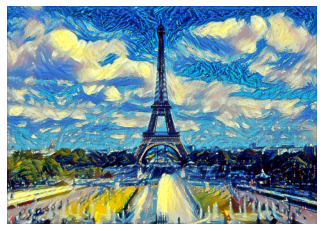

epoch  600   tensor(3227.8403, device='cuda:0', grad_fn=<AddBackward0>)


KeyboardInterrupt: 

In [7]:
# Now let's try to adjust style weight ratio and retrain the image
style_feature_ratio = {"conv1_1" : 0.6, 
                 "conv2_1" : 0.6,
                 "conv3_1" : 0.5,
                 "conv4_1" : 0.3,
                 "conv5_1" : 0.3}
style_transfer()


In [148]:
util.save_image(output,'./output/adam_diff_styleratio.jpg')

Successfully save the final stylized image to: ./output/adam_diff_styleratio.jpg


In [122]:
# don't assign width and height when reading images
# so that we don't scale down the image and rerun the preprocessing code before

style = util.read_image('./image/style_img_v2.jpg').to(device)
content = util.read_image('./image/content_img_2.jpg').to(device)
epochs = 1000

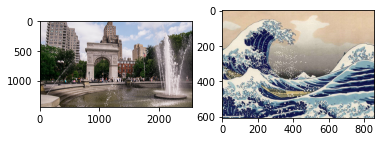

In [125]:
# show image
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.imshow(util.torchTensorToImage(content),label = "Content")
ax2.imshow(util.torchTensorToImage(style),label = "Style")
plt.show()

In [129]:
style_transfer()
util.save_image(output, "./image/output_high_resolution.jpg")

RuntimeError: CUDA out of memory. Tried to allocate 450.00 MiB (GPU 0; 10.00 GiB total capacity; 6.89 GiB already allocated; 0 bytes free; 7.65 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [36]:
util.save_image(output, "./output_high_resolution.jpg")

Successfully save the final stylized image to: ./output_high_resolution.jpg
